In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator



c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Directories
train_dir = "DataSet_V4_9010/train"
val_dir = "DataSet_V4_9010/val"
test_dir = "DataSet_V4_9010/test"

# Rescale images
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [4]:
# Train data
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    batch_size=32,
    target_size=(299, 299),
    class_mode="categorical",
    shuffle=True  # Ensure shuffling
)

# Validation data
val_data = val_datagen.flow_from_directory(
    directory=val_dir,
    batch_size=32,
    target_size=(299, 299),
    class_mode="categorical"
)

# Test data
test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    batch_size=32,
    target_size=(299, 299),
    class_mode="categorical",
    shuffle=False  # No need to shuffle test data
)

print(f"Train dataset size: {train_data.samples}")
print(f"Validation dataset size: {val_data.samples}")
print(f"Test dataset size: {test_data.samples}")

Found 5612 images belonging to 14 classes.
Found 631 images belonging to 14 classes.
Found 699 images belonging to 14 classes.
Train dataset size: 5612
Validation dataset size: 631
Test dataset size: 699


In [5]:
# Steps per epoch
steps_per_epoch = train_data.samples // train_data.batch_size
validation_steps = val_data.samples // val_data.batch_size

# Number of classes
num_classes = train_data.num_classes
print(f"Number of classes: {num_classes}")

# 1. Create a base model with tf.keras.applications
base_model = tf.keras.applications.InceptionV3(include_top=False, input_shape=(299, 299, 3))
base_model.trainable = False  # Freeze base model

# 2. Build custom model
inputs = tf.keras.layers.Input(shape=(299, 299, 3), name="input-layer")
x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = tf.keras.layers.Dense(num_classes, activation="softmax", name="output-layer")(x)
model = tf.keras.Model(inputs, outputs)

# 3. Compile model
model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),  # Smaller learning rate
    metrics=["accuracy"]
)

# 4. Train the model
history = model.fit(
    train_data,
    epochs=10,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_data,
    validation_steps=validation_steps
)

Number of classes: 14


C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 1370s 8s/step - accuracy: 0.2937 - loss: 2.3261 - val_accuracy: 0.6678 - val_loss: 1.5128
Epoch 2/10
  1/175 ━━━━━━━━━━━━━━━━━━━━ 6:08 2s/step - accuracy: 0.5938 - loss: 1.8306

c:\ProgramData\Anaconda3\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


175/175 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.5938 - loss: 1.8306 - val_accuracy: 0.5652 - val_loss: 1.6166
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 1331s 8s/step - accuracy: 0.7023 - loss: 1.3755 - val_accuracy: 0.8141 - val_loss: 1.0206
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9375 - loss: 0.9046 - val_accuracy: 0.8696 - val_loss: 0.8932
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 1317s 8s/step - accuracy: 0.8067 - loss: 0.9532 - val_accuracy: 0.8586 - val_loss: 0.7701
Epoch 6/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8438 - loss: 0.7648 - val_accuracy: 0.7391 - val_loss: 0.9541
Epoch 7/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 1332s 8s/step - accuracy: 0.8635 - loss: 0.7371 - val_accuracy: 0.8734 - val_loss: 0.6405
Epoch 8/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9062 - loss: 0.6337 - val_accuracy: 0.9130 - val_loss: 0.5608
Epoch 9/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 2003s 11s/step - accuracy: 0.8824 - loss: 0.6077 - val_accuracy: 

In [6]:
# 5. Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test accuracy: {test_accuracy:.2f}")

22/22 ━━━━━━━━━━━━━━━━━━━━ 206s 9s/step - accuracy: 0.8635 - loss: 0.5396
Test accuracy: 0.88


In [7]:
# 6. Save the model
model.save("BirdSpecies_V4_9010.h5")

Found 699 images belonging to 14 classes.


C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 535s 23s/step


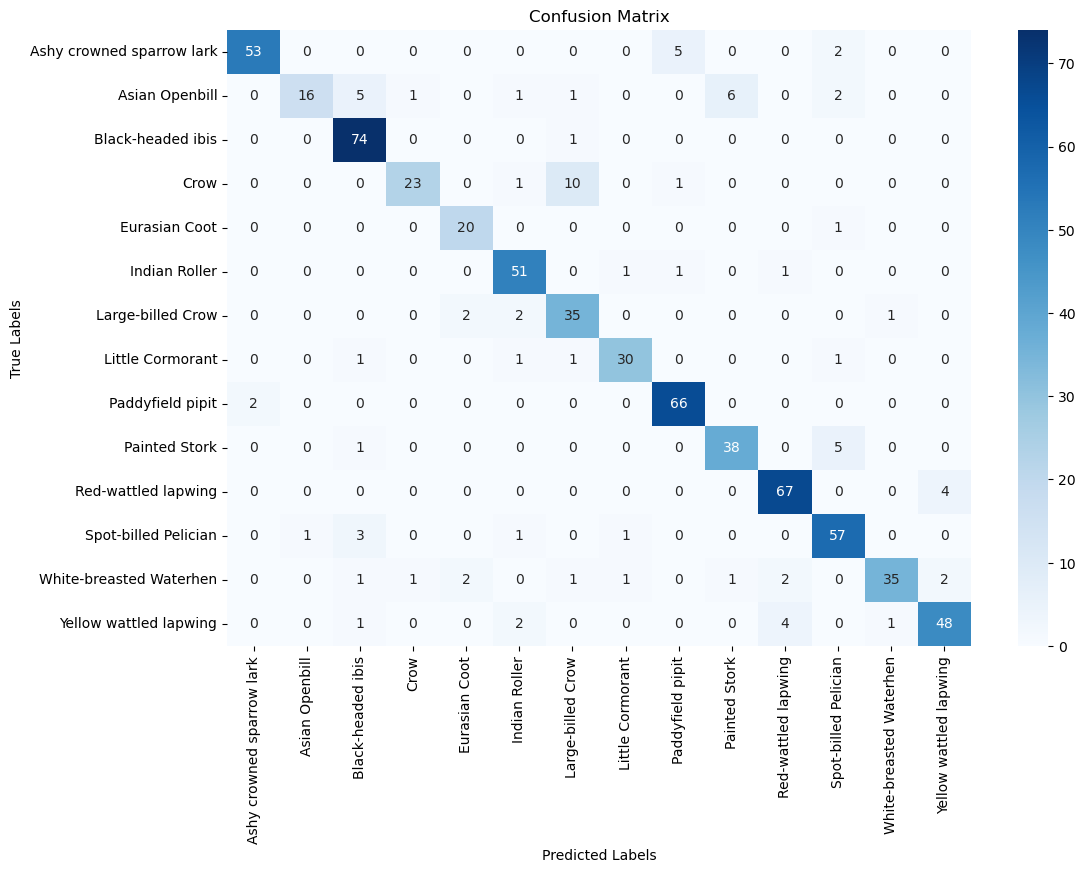

Classification Report:
                            precision    recall  f1-score   support

Ashy crowned sparrow lark       0.96      0.88      0.92        60
           Asian Openbill       0.94      0.50      0.65        32
        Black-headed ibis       0.86      0.99      0.92        75
                     Crow       0.92      0.66      0.77        35
            Eurasian Coot       0.83      0.95      0.89        21
            Indian Roller       0.86      0.94      0.90        54
        Large-billed Crow       0.71      0.88      0.79        40
         Little Cormorant       0.91      0.88      0.90        34
         Paddyfield pipit       0.90      0.97      0.94        68
            Painted Stork       0.84      0.86      0.85        44
      Red-wattled lapwing       0.91      0.94      0.92        71
     Spot-billed Pelician       0.84      0.90      0.87        63
  White-breasted Waterhen       0.95      0.76      0.84        46
   Yellow wattled lapwing       0.89 

In [2]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the model
model = load_model('BirdSpecies_V4_9010.h5')

# Path to test data
test_dir = r'E:\CAPSTONE\Bird_Species_Classification\DataSet_V4_9010\test'

# Image data generator for preprocessing
test_datagen = ImageDataGenerator(rescale=1./255)

# Load test data
test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(299, 299),  # Adjust size as per your model's input
    batch_size=32,
    class_mode='categorical',  # Use 'binary' if you have two classes
    shuffle=False  # Do not shuffle to match predictions with true labels
)

# Get class indices
class_indices = test_data.class_indices
class_labels = list(class_indices.keys())

# Predict on test data
predictions = model.predict(test_data)
y_pred = np.argmax(predictions, axis=1)
y_true = test_data.classes

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification report
report = classification_report(y_true, y_pred, target_names=class_labels)
print("Classification Report:\n", report)
